# Trabajo Final - David Zapata

## 04- modelo 2

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

 Mejores hiperparámetros:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


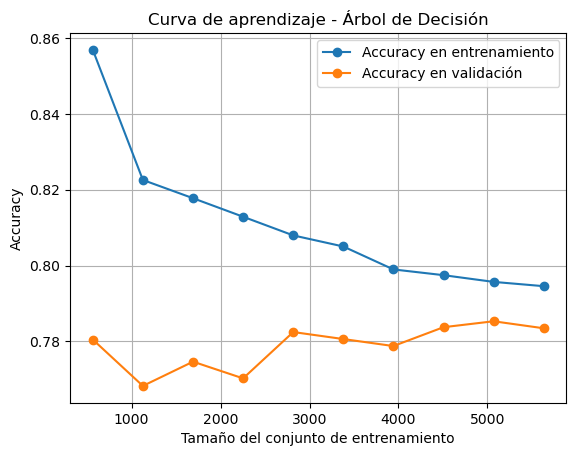


 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1036
           1       0.66      0.39      0.49       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



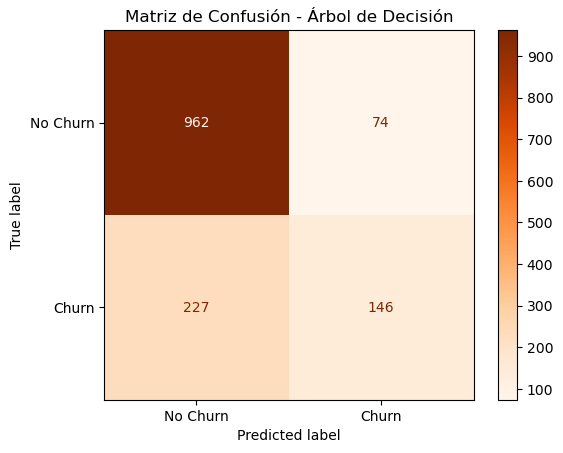

In [8]:
df = pd.read_csv("dataset_preprocesado.csv")

X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print(" Mejores hiperparámetros:")
print(grid_dt.best_params_)

best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test)

train_sizes, train_scores, test_scores = learning_curve(
    best_dt, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Accuracy en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Accuracy en validación")
plt.title("Curva de aprendizaje - Árbol de Decisión")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Oranges')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()